## Analysis of Yelp Dataset Portfolio2 

The portfolio aims to use various data processing techniques to clean and preprocess the data, filter out irrelevant data, and remove any outliers that could impact the accuracy of the model. Finally, the portfolio aims to use linear regression models to train and validate the model's accuracy in predicting user ratings towards business. Ultimately, the objective is to build a reliable model that can be used to provide insights into user preferences and help businesses make data-driven decisions to improve their services and offerings. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use Yelp sub-dataset.

### Import the output sample data from Portfolio1
The csv file named `Yelp_Portfolio2_Input.csv` is provided. You may need to use the Pandas method, i.e., `read_csv`, for doing this. After that, please import the csv file and print out its total length.

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [42]:
sample_data = pd.read_csv('Yelp_Portfolio2_Input.csv')
print(len(sample_data))

38654


In [43]:
sample_data.head()

business_categories business_city             business_id  \
0   Middle Eastern; Restaurants         Tempe  6oRAC4uyJCsJl1X0WZpVSA   
1         Tattoo; Beauty & Spas         Tempe  WGNIYMeXPyoWav1APUq7jA   
2             Tires; Automotive      Glendale  rxQ2PIjhAx6dgAqUalf99Q   
3       Sushi Bars; Restaurants         Tempe  EC9WB-iVjd28B6R6KIZ8TA   
4  Arts & Entertainment; Cinema         Tempe  LDJhwZN14AZOJyHjg2lkRw   

         date  stars                                               text  \
0   14/6/2012      4  love the gyro plate. Rice is so good and I als...   
1  23/12/2011      4  Good tattoo shop. Clean space, multiple artist...   
2    9/9/2012      5  Never having dealt with a Discount Tire in Pho...   
3    4/8/2010      4  Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...   
4  13/12/2011      4  We got passes for the preview of Mission Impos...   

   useful                 user_id  
0       1  0hT2KtfLiobPvh6cDC8JQg  
1       2  Xm8HXE1JHqscXe5BKf0GFQ  
2       0  HLbhD2OyiMCUDRR4c1iXaw  
3       0  jdoGEEy5s-5L1O_lNzEi2g  
4       0  Mb0psF4WQF7gZSuZafVr-g

# Q1. `business_categories` processing

You may notice that there are a total of 693 unique business categories present in the sample data. Please write a code snippet to confirm this number. Then, generate a boxplot of `stars` for `business_categories`.

In [44]:
# your code and solutions]
unique_business_categories = sample_data['business_categories'].nunique()
print(f'The total number of unique business categories in the sampled data are {unique_business_categories}.')


The total number of unique business categories in the sampled data are 693.


Text(0.5, 1.0, 'Boxplot distribution of stars for business categories')

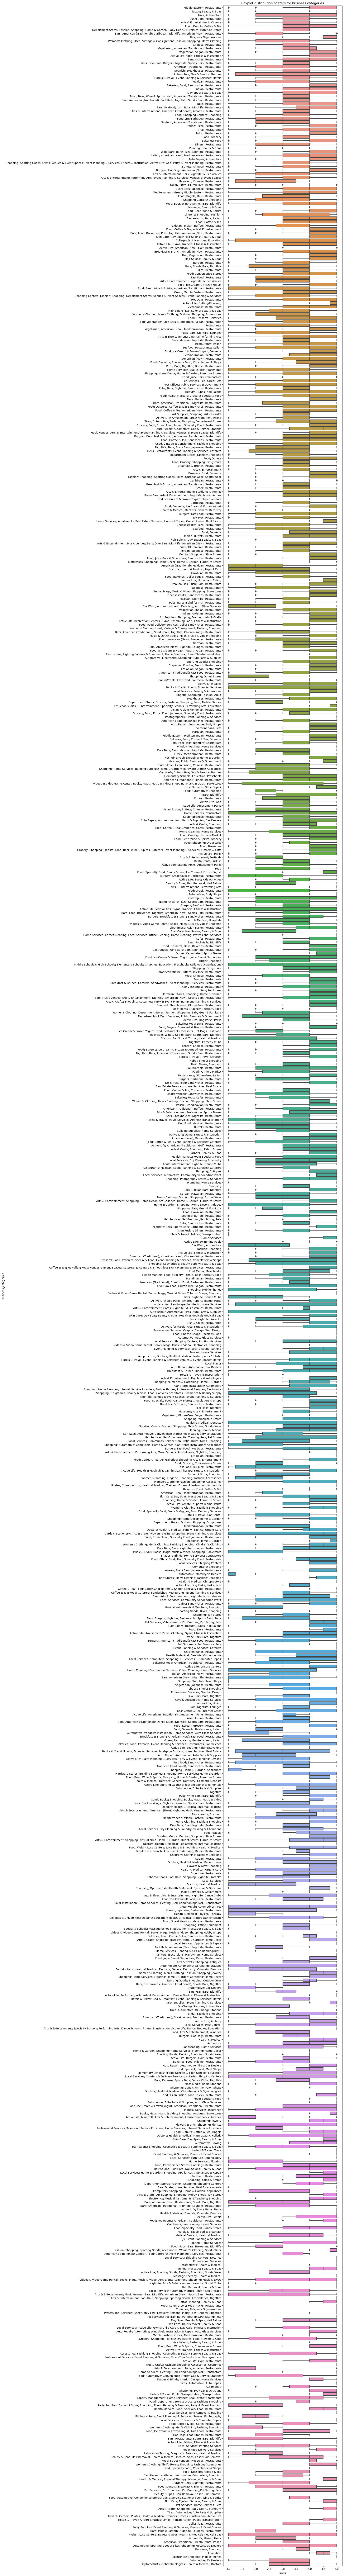

In [45]:
boxplot = sample_data
max_ratings = 5
stars = sample_data
business_categories = sample_data.columns[2:].values
for categories in business_categories:
    currgroup = sample_data[sample_data[categories] == 1]

if currgroup.stars.value_counts().sum() >= max_ratings:
    
    if currgroup.stars.mean() >= upper_perc or currgroup.stars.mean() <= lower_perc:
        
        stars = pd.DataFrame({ 'Stars': currgroup.stars, 'Category': currgroup[business_categories].name , 'Mean': currgroup.stars.mean()})
boxplot = pd.concat([stars, boxplot])    


fig, ax = plt.subplots(figsize=(8, boxplot['business_categories'].nunique()/4))
ax = sns.boxplot(x='stars', y='business_categories', data=sample_data)

plt.title('Boxplot distribution of stars for business categories')



Sometimes we need to extract some major categories, such as `Middle Eastern; Restaurants` and `Sushi Bars; Restaurants`, both of which should belong to the `Restaurants` category.

### Q1.1 How to efficiently and accurately extract the last category value (i.e., categorieN) from the `business_categories` column in a dataset, where the format of each row is a semicolon-separated list of categories (i.e., 'categorie1; categorie2;...;categorieN')? and replace the original string with this last category value. At last, print the first five rows.

In [46]:
sample_data['business_categories'] = sample_data['business_categories'].str.split(';').str[-1]

#At last, print the first five rows
sample_data.head()

business_categories business_city             business_id        date  \
0         Restaurants         Tempe  6oRAC4uyJCsJl1X0WZpVSA   14/6/2012   
1       Beauty & Spas         Tempe  WGNIYMeXPyoWav1APUq7jA  23/12/2011   
2          Automotive      Glendale  rxQ2PIjhAx6dgAqUalf99Q    9/9/2012   
3         Restaurants         Tempe  EC9WB-iVjd28B6R6KIZ8TA    4/8/2010   
4              Cinema         Tempe  LDJhwZN14AZOJyHjg2lkRw  13/12/2011   

   stars                                               text  useful  \
0      4  love the gyro plate. Rice is so good and I als...       1   
1      4  Good tattoo shop. Clean space, multiple artist...       2   
2      5  Never having dealt with a Discount Tire in Pho...       0   
3      4  Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...       0   
4      4  We got passes for the preview of Mission Impos...       0   

                  user_id  
0  0hT2KtfLiobPvh6cDC8JQg  
1  Xm8HXE1JHqscXe5BKf0GFQ  
2  HLbhD2OyiMCUDRR4c1iXaw  
3  jdoGEEy5s-5L1O_lNzEi2g  
4  Mb0psF4WQF7gZSuZafVr-g

### Q1.2 Let's first check how many unique business categories are present in the dataset (output from Q1.1). Maybe it's still not an appropriate number to make a clear Boxplot. Now, we want to display `ALL Rows` of the business category count data. That is to count and print the number of occurrences for each business category.

In [47]:
# your code and solutions
unique_business_categories = sample_data['business_categories'].nunique()
print(f'The unique business categories that are present in the dataset are:',unique_business_categories)

The unique business categories that are present in the dataset are: 195


In [48]:
unique_business_categories = sample_data.groupby('business_categories')['business_id'].nunique().reset_index(name='count')
unique_business_categories


business_categories  count
0                     Accessories      8
1                     Active Life      2
2                           Adult      1
3            Amateur Sports Teams      1
4                 Amusement Parks      4
..                            ...    ...
190         Professional Services      1
191  Public Services & Government      1
192       Religious Organizations      2
193                   Restaurants     46
194                      Shopping      3

[195 rows x 2 columns]

### Q1.3 We want to remove categories that appear fewer than 200 times. Write a Python code snippet to perform this operation. At last, print the number of resulting unique business_categories.

In [49]:
#emove categories that appear fewer than 200 times
business_category_count = sample_data['business_categories'].value_counts()
repeated_categories = business_category_count[business_category_count >= 200]

repeated_businesses = sample_data[sample_data['business_categories'].isin(repeated_categories.index)]
sample_data2 = len(repeated_businesses['business_categories'].unique())

print("Number of unique business categories that appear fewer than 200 times:",sample_data2)



Number of unique business categories that appear fewer than 200 times: 19


# Q2. Outliers

### Q2.1 Remove any rows from the sample_data DataFrame (output from Q1.3) where the `useful` column has a value of 6 or more; Then, create a single figure with two subplots, one showing the boxplot of `useful` column of the original data and the other showing the boxplot of the data with outliers removed. 

At last, __print the length of the data__.

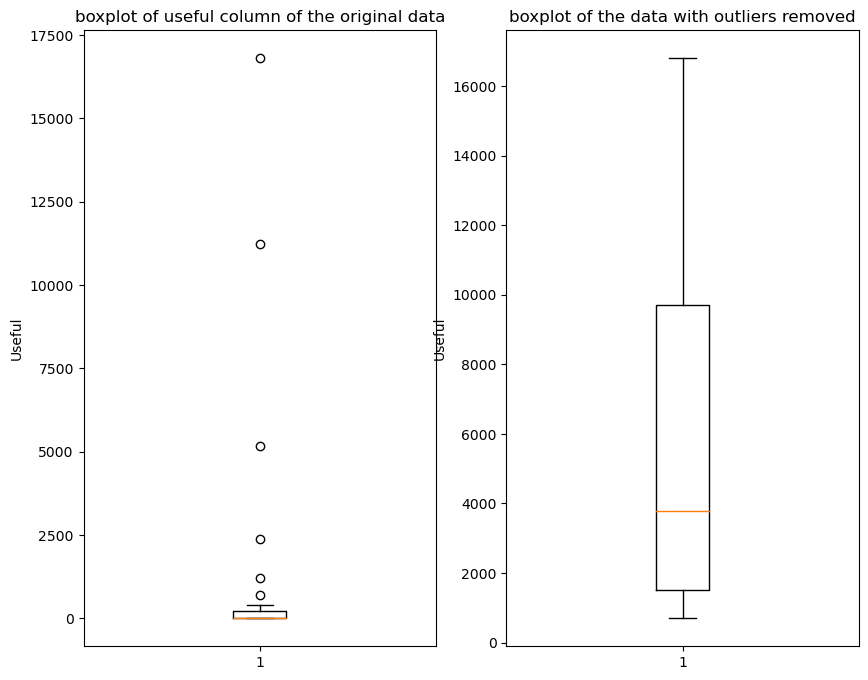

In [50]:
useful_count = sample_data.groupby('useful').size()
#Remove any rows where the useful column has a value of 6 or more
sample_data3 = useful_count[useful_count.index < 6]

## boxplot of orginal data
fig, axs = plt.subplots(1,2, figsize=(10,8))
axs[0].boxplot(useful_count.values)
axs[0].set_title('boxplot of useful column of the original data')
axs[0].set_ylabel('Useful')

#boxplot of the data with outliers removed
axs[1].boxplot(sample_data3.values)
axs[1].set_title('boxplot of the data with outliers removed')
axs[1].set_ylabel('Useful')
plt.show()

### Q2.2 In general, we might remove some inactive users from a dataset (output from Q2.1), for example, users who rate businesses less than 3 times. However, in this case, we are doing the opposite and removing extremely active users who rate businesses more than 30 times (>30). Again, create a single figure with two subplots, one showing the boxplot of the count of business rating given by each user and the other showing the boxplot of the data with outliers removed. 

At last, __print the length of the data__.

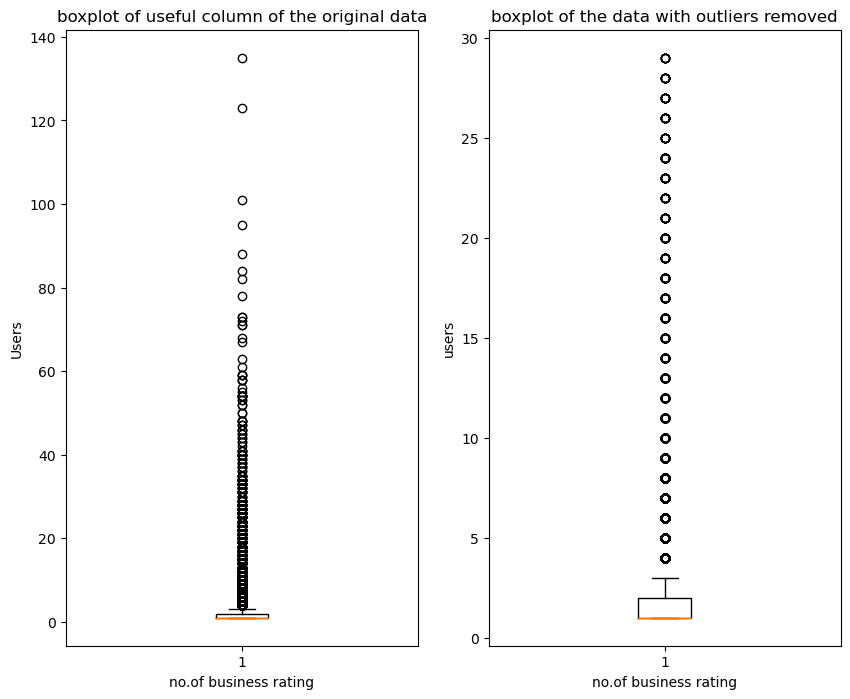

In [51]:
# your code and solutions
users_rating = sample_data.groupby('user_id')['business_id'].count()

# the boxplot of the count of business rating given by each user
fig, axs = plt.subplots(1,2, figsize=(10,8))
axs[0].boxplot(users_rating.values)
axs[0].set_title('boxplot of useful column of the original data')
axs[0].set_ylabel('Users')
axs[0].set_xlabel('no.of business rating')

active_users = users_rating[users_rating < 30]
# boxplot of the data with outliers removed
axs[1].boxplot(active_users.values)
axs[1].set_title('boxplot of the data with outliers removed')
axs[1].set_ylabel('users')
axs[1].set_xlabel('no.of business rating')

plt.show()

# Q3. Training a LinearRegression model on the data output from Q2.2.

### Q3.1 How to build a linear regression model on a subset of the data, using the `useful` column as the input variable and the `stars` column as the output variable. Split the data into a training set and a test set, with 70% of the data used for training. The random_state is set to 42.

In [52]:
# your code and solutions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = sample_data['useful'].values.reshape(-1,1)
y = sample_data['stars'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

print('The coeffecient of linear regression:', lr.coef_)

Rsquare = lr.score(X_test, y_test)
print('R-square:', Rsquare)




The coeffecient of linear regression: [-0.03988867]
R-square: 0.0046694455176116145


### Q3.2 Assuming that the number of reviews a business has received  `business_review_count`  can greatly influence the average rating that the business has received. Now, we create the relevant variable to the data, and do the LinearRegression again to the `stars`. 

In [53]:
business_review_count = sample_data.groupby('business_id')['useful'].count().reset_index()
business_review_count = business_review_count.rename(columns={'useful':'business_review_count'})
sample_data = pd.merge(sample_data,business_review_count, on='business_id')

X = sample_data['business_review_count'].values.reshape(-1,1)
y = sample_data['stars'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X,y)
print(f'The coeffecient of linear regression is:', model.coef_)
print(f'The intercept of linear regression is:', model.intercept_)



The coeffecient of linear regression is: [0.00126713]
The intercept of linear regression is: 3.585660170737851


### Q3.3 Output the correlations between `business_review_count` and `useful` variables with `stars` and analyze the results.

In [54]:
# your code and solutions
cols = ['business_review_count', 'stars']
sample_data4 = sample_data[cols]
corr = sample_data.corr()


print(f'The correlations between business_review_count with stars:',corr.loc['business_review_count', 'stars'])


The correlations between business_review_count with stars: 0.13544750601633937


## Analysis:
There is a positive but weak correlation between business review count and stars. This means that the relationship is not much strong between these two variables. Therefore, the businesses with more number of reviews doesnt mean that it would have high star rating.

In [58]:
cols = ['useful', 'stars']
sample_data5 = sample_data[cols]
corr = sample_data.corr()


print(f'The correlations between useful with stars:',corr.loc['useful', 'stars'])


The correlations between useful with stars: -0.06390086761326072


## Analysis:
There is a negative and weak correlation between useful reviews and star rating which is **-0.0639** This means that the relationship between two variables is not strong. Therefore, more useful review a business gets doesnt mean that it would have more star rating.